In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [113]:
time = np.linspace(0.0, 5.9990, num=6000)

In [243]:
avgs_v = np.zeros(6000)
for file in ['pie/wetried_1.xlsx', 'pie/wetried_2.xlsx', 'pie/wetried_3.xlsx', 'pie/wetried_4.xlsx', 'pie/wetried.xlsx',]:
    tmp = pd.read_excel(file)
    for i, num in enumerate(tmp['Voltage (Collected)']):
        avgs_v[i] += num
voltage = avgs_v/5

In [244]:
acceleration = (voltage * 1.02) / (1.02 * voltage[0]) - 1

In [245]:
velocity = []
a_neg = acceleration[0]
v_neg = 0
dt = 1/1000
for a_now in acceleration:
    v_now = v_neg + (dt/2 * (a_neg - a_now))
    velocity.append(v_now)
    v_neg = v_now
    a_neg = a_now

In [246]:
position = []
v_neg = velocity[0]
x_neg = 0
dt = 1/1000
for v_now in velocity:
    x_now = x_neg + (dt/2 * (v_neg - v_now))
    position.append(x_now)
    x_neg = x_now
    v_neg = v_now

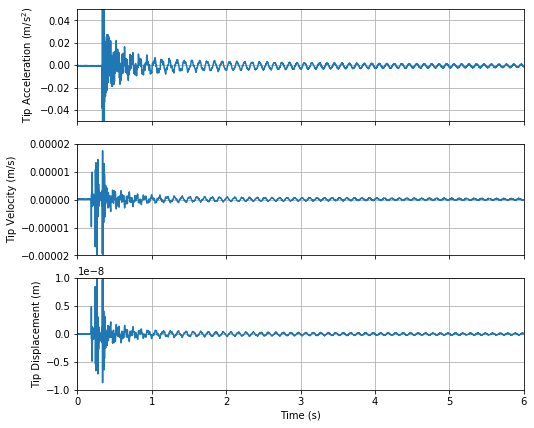

In [292]:
fig, axs = plt.subplots(3, figsize=(8, 7))

axs[0].plot(time, acceleration)
axs[0].set_ylabel(r'Tip Acceleration (m/s$^2$)')
axs[0].label_outer()
axs[0].set_ylim(-.05,.05)
axs[0].set_xlim(0,6)
axs[0].grid(True)

axs[1].plot(time, velocity)
axs[1].set_ylabel(r'Tip Velocity (m/s)')
axs[1].label_outer()
axs[1].set_ylim(-.00002,.00002)
axs[1].set_xlim(0,6)
axs[1].grid(True)


axs[2].plot(time, position)
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel(r'Tip Displacement (m)')
axs[2].set_ylim(-.00000001,.00000001)
axs[2].set_xlim(0,6)
axs[2].grid(True)


plt.savefig('first.png', transparent=True)

# STUFF

In [283]:
psdAvgAccel = np.zeros(3000)
for file in ['pie/wetried_1.xlsx', 'pie/wetried_2.xlsx', 'pie/wetried_3.xlsx', 'pie/wetried_4.xlsx', 'pie/wetried.xlsx',]:
    tmp = pd.read_excel(file)
    voltage = tmp['Voltage (Collected)']
    acceleration = (voltage * 1.02) / (1.02 * voltage[0]) - 1
    dftAccel = np.fft.fft(acceleration)
    dftAccel = dftAccel[1:int(len(acceleration)/2+1)]
    
    psdAccel = []
    for dft in dftAccel:
        psdAccel.append((1/(1000*len(acceleration))) * abs(dft)**2)
        
    for i, bop in enumerate(psdAccel[2:-1]):
        psdAccel[2 + i] = 2*bop
    
    for i, num in enumerate(psdAccel):
        psdAvgAccel[i] += num
psdAvgAccel = psdAvgAccel/5

In [285]:
fvec = np.linspace(0, 1000/2, num = len(psdAvgAccel))

plotable = []
for num in psdAvgAccel:
    plotable.append(10.0*np.log(10)*num)

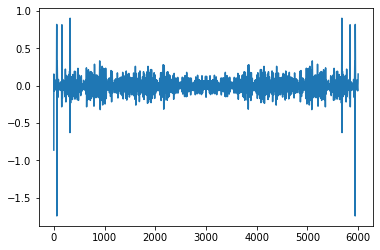

In [265]:
plt.plot(dftAccel)

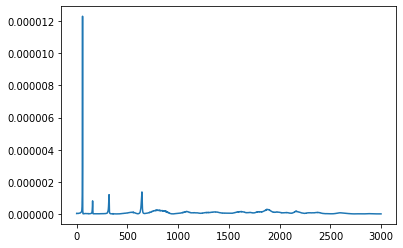

In [255]:
plt.plot(psdAccel)

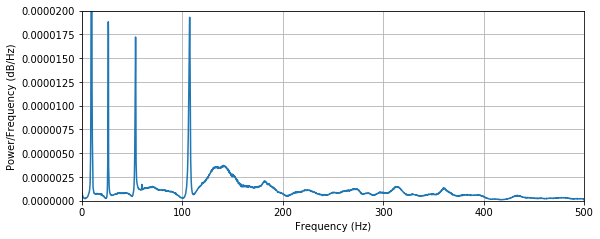

In [303]:
fig, axs = plt.subplots(1, figsize=(9, 3.5))

axs.plot(fvec, plotable)
axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('Power/Frequency (dB/Hz)')
axs.set_ylim(0, .00002)
axs.set_xlim(0, 500)
axs.grid(True)

plt.savefig('second.png', transparent=True)